This notebook is divided in 5 main sections:

1. [Data preprocessing and EDA](#1.-Data-preprocessing-and-EDA)
2. [Feature Engineering](#2.-Feature-Engineering)
3. [Model building](#3.-Model-building)
4. [Final model performance using best hyperparameters](#4.-Final-model-performance-using-best-hyperparameters)
5. [Prediction of test data](#5.-Prediction-of-test-data)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading train file

df = pd.read_csv("training_set.csv")
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


# 1. Data preprocessing and EDA

In [3]:
# data cleaning

df.drop("Unnamed: 0", axis=1, inplace = True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [4]:
# getting shape

df.shape

(3910, 58)

In [5]:
describe_data = df.describe()
describe_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,18.180000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


**Observation(s):**
- From above information, it can be seen for many features, range is quite different, for example max value of X1 is 4.34 but for X57 its more than 10K. 
- Mean is nearly same as median for some features like X4 whereas different for some, example: feature X56
- Hence we will have to use scaling.

In [6]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
Y      0
dtype: int64

In [7]:
df.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
X24    float64
X25    float64
X26    float64
X27    float64
X28    float64
X29    float64
X30    float64
X31    float64
X32    float64
X33    float64
X34    float64
X35    float64
X36    float64
X37    float64
X38    float64
X39    float64
X40    float64
X41    float64
X42    float64
X43    float64
X44    float64
X45    float64
X46    float64
X47    float64
X48    float64
X49    float64
X50    float64
X51    float64
X52    float64
X53    float64
X54    float64
X55    float64
X56      int64
X57      int64
Y        int64
dtype: object

In [8]:
df['Y'].value_counts()

0    2376
1    1534
Name: Y, dtype: int64

**Observation(s):**
- No null values
- All data is in numerical form
- It has an imbalanced class. We will have to balance the weights in the model.

In [9]:
# separating features
X = df.drop('Y', axis=1)

<AxesSubplot:>

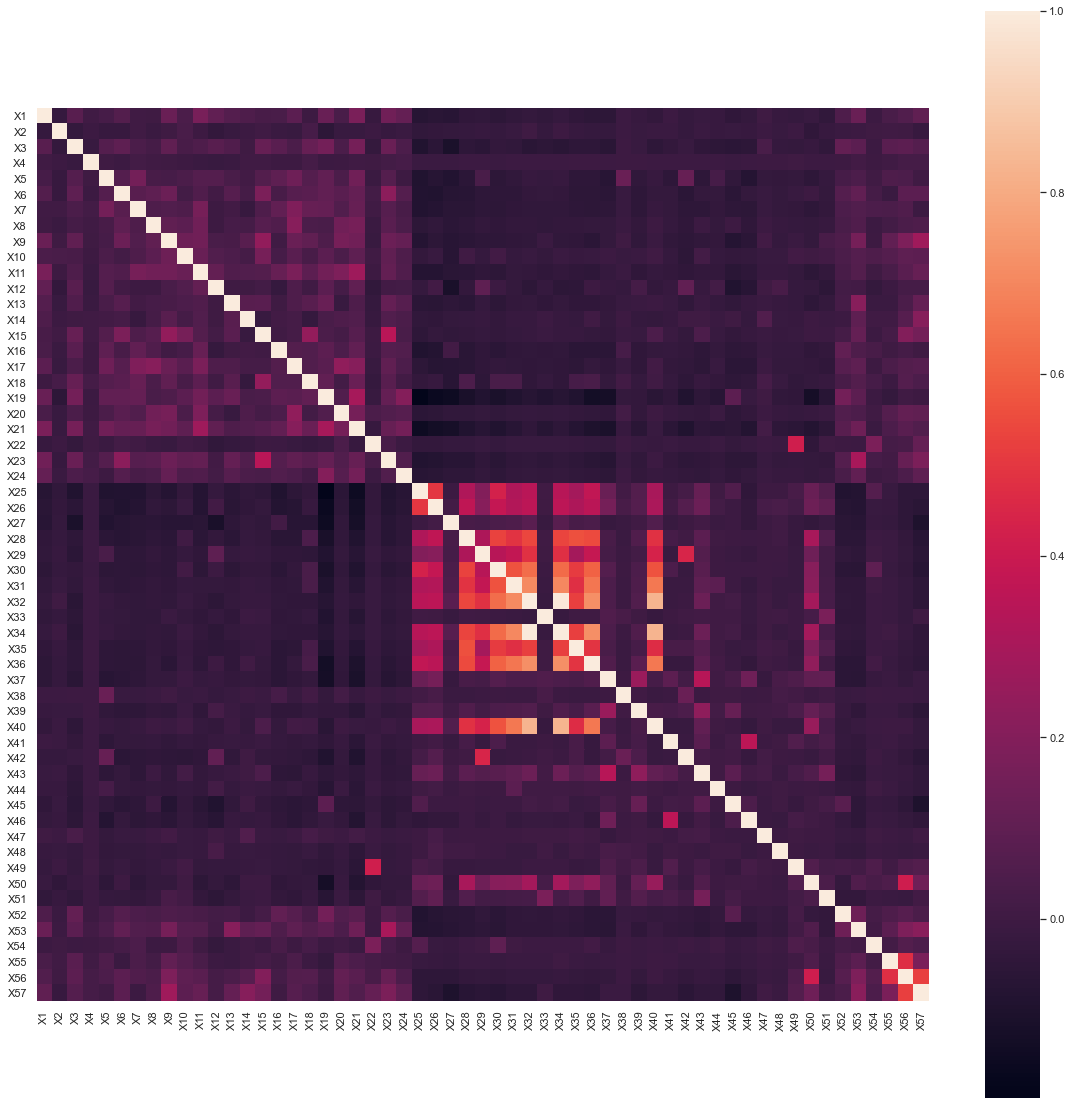

In [10]:
# linear correlation check
import seaborn as sns

correlation_matrix = np.corrcoef(X.values.T)
plt.figure(figsize=(20,20))
sns.set(font_scale=1)
sns.heatmap(correlation_matrix, cbar=True, annot=False, square=True, fmt='.2f', annot_kws={'size':14}, 
            yticklabels=X.columns, xticklabels=X.columns)

**Observation(s):**
From the above correlation matrix, we see that features X32 and X34 looks to be highly correlated with each other. Also, few features like in the middle region also seem to be correlated with each other to certain extent. Will further verify this by using Variance Inflation Factor.

In [11]:
# outliers check

upper_quartile = X.quantile(.75)
lower_quartile = X.quantile(.25)

iqr = upper_quartile - lower_quartile
cut_off = iqr*1.5

lower_cut = lower_quartile - cut_off
upper_cut = upper_quartile + cut_off

outlier_mask = (X > lower_cut) | (X < upper_cut)

In [12]:
# removing outliers

X_new = X[outlier_mask]
X_new

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,NaN,NaN,4.34,NaN,0.00,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.000,NaN,1.342,0.000,NaN,1.200,2,12
1,NaN,0.56,0.56,NaN,1.12,0.56,2.25,NaN,NaN,0.56,...,NaN,NaN,0.083,NaN,0.503,0.000,0.083,16.304,148,375
2,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.000,NaN,0.000,0.000,NaN,1.000,1,5
3,0.64,NaN,0.64,NaN,1.93,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.000,NaN,0.462,0.370,NaN,2.440,22,122
4,0.58,NaN,0.00,35.46,0.58,NaN,0.58,0.58,NaN,0.00,...,NaN,NaN,0.000,NaN,0.239,0.239,NaN,3.338,123,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.000,NaN,0.000,0.000,NaN,1.714,4,12
3906,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,0.00,...,NaN,NaN,0.000,NaN,0.000,0.000,NaN,2.000,3,4
3907,0.12,NaN,0.12,NaN,0.00,0.25,NaN,NaN,NaN,0.00,...,NaN,NaN,0.093,NaN,0.023,0.000,NaN,1.247,5,131
3908,NaN,NaN,0.00,NaN,0.00,NaN,NaN,3.12,NaN,0.00,...,NaN,NaN,0.198,NaN,0.198,0.198,NaN,3.857,25,81


In [13]:
X_new.dropna()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57


We will not be eliminating outliers as it did not work for this data set

# 2. Feature Engineering

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [15]:
# multi collinearity check

input_cols = X.columns

def VIF(df_, col_names):
    '''
    Calculates Variance inflation factor
    df_: input data frame
    col_names: name of the columns of data frame
    '''
    for i in range(len(col_names)):
        xvars = list(col_names)
        yvars = xvars.pop(i)
        mod = sm.OLS(df_[yvars], sm.add_constant(df_[xvars]))
        res = mod.fit()
        vif = 1/(1-res.rsquared)
        print(yvars,round(vif,3))

In [16]:
VIF(X, input_cols)

X1 1.115
X2 1.033
X3 1.111
X4 1.006
X5 1.131
X6 1.114
X7 1.123
X8 1.104
X9 1.233
X10 1.087
X11 1.206
X12 1.111
X13 1.096
X14 1.078
X15 1.357
X16 1.069
X17 1.2
X18 1.159
X19 1.32
X20 1.134
X21 1.327
X22 1.3
X23 1.322
X24 1.088
X25 1.563
X26 1.516
X27 1.115
X28 1.94
X29 1.841
X30 2.184
X31 2.379
X32 110.333
X33 1.059
X34 107.19
X35 1.72
X36 2.656
X37 1.281
X38 1.047
X39 1.146
X40 3.534
X41 1.172
X42 1.461
X43 1.233
X44 1.036
X45 1.094
X46 1.21
X47 1.014
X48 1.015
X49 1.249
X50 1.637
X51 1.087
X52 1.082
X53 1.233
X54 1.078
X55 1.424
X56 2.398
X57 1.635


**Observation(s):**
- From above result it can be seen that **X32 and X34** has a very high Variance inflation factor which can cause multicollinearity. Hence this strengthens our previous assumption. 
- However, our assumption for other features did not come true as all other features have a very low VIF i.e below 5.

Before eliminating lets also check their significance with the target variable.

In [17]:
# train test split
x_train,x_val,y_train,y_val= train_test_split(X, df['Y'],
                                               test_size=.2, random_state=42)

# scaling
scaled_x = StandardScaler()
scaled_train_x = scaled_x.fit_transform(x_train)
scaled_val_x = scaled_x.transform(x_val)

In [18]:
# data distribution
print(X.shape, x_train.shape, x_val.shape)

(3910, 57) (3128, 57) (782, 57)


In [19]:
#feature_select = SelectKBest(score_func=f_classif, k=)
f_stat, p_value = f_classif(scaled_train_x,y_train)

df_stats = pd.DataFrame(data = [f_stat, p_value], columns=input_cols, index = ['f_stat', 'p_val'])
df_stats = df_stats.T
df_stats.sort_values(by='p_val')

,f_stat,p_val
X21,573.133978,1.931742e-116
X23,384.409617,8.074249e-81
X7,382.749119,1.694722e-80
X53,359.829341,4.893461e-76
X19,277.220034,1.049644e-59
X57,262.177977,1.094025e-56
X17,254.880316,3.223031e-55
X5,239.585803,3.966074e-52
X9,222.796212,1.017821e-48
X6,221.519031,1.852510e-48


**Observation(s):**
Here it can be seen that X12 is highly insignificant as **p_value is greater than 0.05** & X38 is slightly above 0.05. Hence we will be removing them later.

In [20]:
# feature selection
select = SelectKBest(score_func=f_classif, k=35)
fit = select.fit(scaled_train_x,y_train)
features = fit.transform(scaled_train_x)

# get name of selected features
mask = select.get_support()
imp_features = X.columns[mask]
imp_features

Index(['X1', 'X3', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X15', 'X16',
       'X17', 'X18', 'X19', 'X20', 'X21', 'X23', 'X24', 'X25', 'X26', 'X27',
       'X28', 'X29', 'X30', 'X35', 'X36', 'X37', 'X42', 'X43', 'X45', 'X46',
       'X52', 'X53', 'X56', 'X57'],
      dtype='object')

The above list gives us **35 most important features**. We will use it later to see if it gives better results

In [21]:
# putting scaled training and validation data in data frames

scaled_data_tr_X = pd.DataFrame(scaled_train_x, columns=input_cols)
scaled_data_val_X = pd.DataFrame(scaled_val_x, columns=input_cols)

# 3. Model building

## Using Logistic regression

As it is a binary calssification, we can use logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, jaccard_score, classification_report

In [23]:
def model_pred(c, x, y, x_val_):
    """
    Trains model using Logistic regression. Predict validation data and
    gives various prints different performance metrics
    
    c: regualrization parameter of LogisticRegessor
    x: training features data
    y: training target data
    x_val_: validation features data
    """
    LR = LogisticRegression(C=c, solver='liblinear', class_weight = {0:0.823, 1:1.274}).fit(x , y) #weight = total_samples / (n_classes * class_samples)
    
    print(LR)
    print()

    y_prediction = LR.predict(x_val_)

    print("Accuracy Score:", round(accuracy_score(y_prediction, y_val),3))
    print("Jaccard Score:", round(jaccard_score(y_prediction, y_val),3))
    print()
    
    print('Confusion Matrix:\n')
    print(pd.crosstab(y_val, y_prediction, rownames=['Actual'], colnames=['Predicted']))
    
    print()
    print ("Classification report:\n", classification_report(y_val, y_prediction))
    
    return LR

## Model performance analysis

In [24]:
# Iteration 1: We will consider all features

model_pred(0.01, scaled_data_tr_X, y_train, scaled_data_val_X)

LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

Accuracy Score: 0.912
Jaccard Score: 0.801

Confusion Matrix:

Predicted    0    1
Actual             
0          435   38
1           31  278

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       473
           1       0.88      0.90      0.89       309

    accuracy                           0.91       782
   macro avg       0.91      0.91      0.91       782
weighted avg       0.91      0.91      0.91       782



LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

In [25]:
# Iteration 2: We will drop X38 and X12 as they both have p_value > 0.05

model_pred(0.01, scaled_data_tr_X.drop(['X12', 'X38'], axis=1), y_train, scaled_data_val_X.drop(['X12','X38'], axis=1))

LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

Accuracy Score: 0.905
Jaccard Score: 0.79

Confusion Matrix:

Predicted    0    1
Actual             
0          430   43
1           31  278

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       473
           1       0.87      0.90      0.88       309

    accuracy                           0.91       782
   macro avg       0.90      0.90      0.90       782
weighted avg       0.91      0.91      0.91       782



LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

In [26]:
# Iteration 3: We will use the 35 most significant features

model_pred(0.01, scaled_data_tr_X[imp_features], y_train, scaled_data_val_X[imp_features])

LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

Accuracy Score: 0.907
Jaccard Score: 0.79

Confusion Matrix:

Predicted    0    1
Actual             
0          434   39
1           34  275

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       473
           1       0.88      0.89      0.88       309

    accuracy                           0.91       782
   macro avg       0.90      0.90      0.90       782
weighted avg       0.91      0.91      0.91       782



LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

In [27]:
# Iteration 4: We will drop X38, X12 due to high p_value also X32 as it had high VIF to check if it improves the model

# Calculating VIF after eliminating X12, X38 & X32
input_cols_2 = X.drop(['X12', 'X38', 'X32'], axis=1).columns
VIF(X.drop(['X12', 'X38', 'X32'], axis=1), input_cols_2)

X1 1.107
X2 1.031
X3 1.109
X4 1.005
X5 1.113
X6 1.114
X7 1.121
X8 1.104
X9 1.232
X10 1.085
X11 1.199
X13 1.096
X14 1.078
X15 1.357
X16 1.066
X17 1.199
X18 1.158
X19 1.315
X20 1.133
X21 1.324
X22 1.299
X23 1.321
X24 1.087
X25 1.563
X26 1.512
X27 1.105
X28 1.939
X29 1.809
X30 2.179
X31 2.376
X33 1.058
X34 4.728
X35 1.716
X36 2.643
X37 1.28
X39 1.144
X40 3.497
X41 1.171
X42 1.432
X43 1.232
X44 1.035
X45 1.085
X46 1.206
X47 1.014
X48 1.013
X49 1.248
X50 1.634
X51 1.085
X52 1.082
X53 1.232
X54 1.076
X55 1.414
X56 2.396
X57 1.634


**Observation(s):**
As it can be seen above all features now have VIF less than 5, after eliminating X32.

In [28]:
# dropping 'X12', 'X38', 'X32'

model_pred(0.01, scaled_data_tr_X.drop(['X12', 'X38', 'X32'], axis=1), y_train, scaled_data_val_X.drop(['X12','X38','X34'], axis=1))

LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

Accuracy Score: 0.903
Jaccard Score: 0.785

Confusion Matrix:

Predicted    0    1
Actual             
0          429   44
1           32  277

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       473
           1       0.86      0.90      0.88       309

    accuracy                           0.90       782
   macro avg       0.90      0.90      0.90       782
weighted avg       0.90      0.90      0.90       782



LogisticRegression(C=0.01, class_weight={0: 0.823, 1: 1.274},
                   solver='liblinear')

**Observation(s):**
- We will not be considering first and second model as it contains high VIF and p_values features
- Iteration 3 has f1-score of 0.91
- Removing the three features of high VIF and p_value reduced f1-score of 0.90, as shown in iteration 4
- From the above four iterations, **we conclude that interation 3 gives better overall results, when we considered lesser features (35 best features out of 57)**

Hence we will be choosing model of iteration 3, as it does not contain any insignificant feature or a feature with high VIF and has better performance.

## Using KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_fit=KNeighborsClassifier(n_neighbors=5, p=2)
knn_fit.fit(scaled_data_tr_X[imp_features], y_train)

print('KNN- Confusion Matrix\n\n',pd.crosstab(y_val, knn_fit.predict(scaled_data_val_X[imp_features]), rownames=['Actual'], colnames=['Predicted']))
print('\nKNN- Accuracy: ',round(accuracy_score(y_val, knn_fit.predict(scaled_data_val_X[imp_features])), 3))
print('\nKNN- Classification Report\n', classification_report(y_val, knn_fit.predict(scaled_data_val_X[imp_features])))

KNN- Confusion Matrix

 Predicted    0    1
Actual             
0          440   33
1           48  261

KNN- Accuracy:  0.896

KNN- Classification Report
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       473
           1       0.89      0.84      0.87       309

    accuracy                           0.90       782
   macro avg       0.89      0.89      0.89       782
weighted avg       0.90      0.90      0.90       782



**Conclusion:**
- Using KNN with 35 best features, gives f1-score of 0.90 which is slight less than Logistic regression.
- **We will choose logistic regression model**

## Using Grid search

Chossing the **Logistic model from iteration 3**, we will now use Grid search to get the best hyperparameters for our model.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
# making pipeline with different parameters

LR_2 = LogisticRegression(C=1, solver='liblinear', max_iter=100, class_weight = {0:0.823, 1:1.274})
pipeline = Pipeline([('clf', LR_2)])
parameter = {'clf__C':(0.01, 0.05, 0.1,1), 'clf__max_iter': (100,150,200)}

In [32]:
# applying Grid Search with cross validation
grid_search=GridSearchCV(pipeline, parameter, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')

# Applying above model on scales training data with 35 important features
grid_search.fit(scaled_data_tr_X[imp_features], y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf',
                                        LogisticRegression(C=1,
                                                           class_weight={0: 0.823,
                                                                         1: 1.274},
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.01, 0.05, 0.1, 1),
                         'clf__max_iter': (100, 150, 200)},
             scoring='accuracy', verbose=1)

In [33]:
# checking training score and best hyperparameters to choose

print ('Grid Search Best Training score: %0.3f' % grid_search.best_score_)
print ('Grid Search Best parameters set:\n',grid_search.best_params_)

Grid Search Best Training score: 0.924
Grid Search Best parameters set:
 {'clf__C': 1, 'clf__max_iter': 100}


# 4. Final model performance using best hyperparameters

In [34]:
# Calling Logistic regression model

model = model_pred(1, scaled_data_tr_X[imp_features], y_train, scaled_data_val_X[imp_features])

LogisticRegression(C=1, class_weight={0: 0.823, 1: 1.274}, solver='liblinear')

Accuracy Score: 0.917
Jaccard Score: 0.811

Confusion Matrix:

Predicted    0    1
Actual             
0          438   35
1           30  279

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       473
           1       0.89      0.90      0.90       309

    accuracy                           0.92       782
   macro avg       0.91      0.91      0.91       782
weighted avg       0.92      0.92      0.92       782



**Result:**
Hence, our final model gives Validation **f1-score of 0.92**

# 5. Prediction of test data

In [35]:
# reading test file

df_test = pd.read_csv("test_set.csv")
df_test.drop("Unnamed: 0", axis=1, inplace = True)
df_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [36]:
df_test.shape

(691, 57)

In [37]:
# scaling and feature selection

scaled_test_x = scaled_x.transform(df_test.values)
scaled_test_x = pd.DataFrame(scaled_test_x, columns=input_cols)
scaled_test_x.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,1.949145,-0.163970,0.821381,-0.042263,-0.482971,-0.362346,-0.288686,-0.282026,-0.335632,-0.368156,...,-0.1068,-0.166472,-0.487769,-0.181542,-0.196315,-0.307141,-0.114666,-0.105731,-0.019080,-0.327019
1,-0.343782,-0.163970,1.098313,-0.042263,0.829786,-0.362346,1.949982,-0.282026,-0.335632,-0.368156,...,-0.1068,-0.166472,0.831203,-0.181542,0.601725,0.206039,-0.114666,0.301373,0.546574,-0.056050
2,1.162999,0.059113,0.346640,-0.042263,-0.404831,0.090870,-0.155432,0.485823,1.225087,0.776244,...,-0.1068,-0.166472,-0.266807,-0.181542,0.065337,2.700333,0.314395,0.074128,0.663445,4.670658
3,-0.016221,-0.015248,1.434589,-0.042263,0.767274,2.659099,1.043855,-0.282026,2.568032,-0.213507,...,-0.1068,-0.166472,-0.113834,-0.181542,0.261576,0.321405,-0.072601,0.208884,2.888664,1.810246
4,-0.343782,-0.163970,0.860943,-0.042263,0.642249,-0.362346,1.630173,-0.282026,-0.335632,-0.368156,...,-0.1068,-0.166472,0.749617,-0.181542,0.545826,0.174214,-0.114666,0.169912,-0.089203,-0.056050


In [38]:
# test prediction

y_test_prediction = model.predict(scaled_test_x[imp_features])
y_test_prediction.shape

(691,)

In [39]:
# writing to file

df_test['prediction'] = y_test_prediction
df_test.to_csv('test_set_prediction.csv')

In [40]:
print("Done!")

Done!
